In [6]:
import glob,os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
plt.switch_backend('agg')
import seaborn as sns
sns.set_style( "white" )
sns.set(style="ticks")


import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib import font_manager
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mcolors


font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']  
plt.rcParams['pdf.fonttype'] = 42
%matplotlib inline

In [ ]:
methods = ["brie2", "scquint", "psix", "spliz", "marvel", "scasl"]
datas = ["dataset1", "dataset2", "dataset3", "dataset4",'dataset5']
format_dict = {'brie2':'BRIE2','scquint':'scQuint','psix':'Psix','spliz':'SpliZ','marvel':'MARVEL','scasl':'SCASL'}
records = []
results/brie2/dataset1/BCI_{}.txt
for method in methods:
    for data in datas:
        fin = f'../results/{method}/{data}/Evaluation_score.txt'
        if not os.path.exists(fin):
            continue
        df = pd.read_table(fin, header=0)
        for idx, row in df.iterrows():
            val1 = row.iloc[0]
            val2 = row.iloc[1]
            records.append({
                'Tool': method,
                'Dataset': data,
                'Metric': val1,
                'Score': val2
            })

df = pd.DataFrame(records)
#df.to_csv('../results/Metric_score.csv', index=False)

In [24]:
df['Tool'] = df['Tool'].map(lambda x: format_dict.get(x, x))
df.head(2)

,Tool,Dataset,Metric,Score
0,BRIE2,1.131_GSE81252_253GB,Accuracy,0.888889
1,BRIE2,1.131_GSE81252_253GB,Adjusted Rand Index (ARI),0.796793


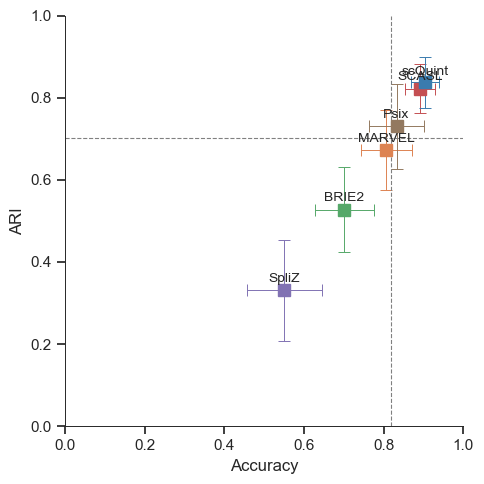

In [25]:
tool_colors = {
    'SCASL': '#C44F52',
    'MARVEL': '#DD8352',
    'SpliZ': '#8172B3',
    'Psix': '#937960',
    'scQuint': '#3a7bae',
    'BRIE2':'#55A869'
}
metrics_of_interest = ['Accuracy', 'Adjusted Rand Index (ARI)']
df_filtered = df[df['Metric'].isin(metrics_of_interest)]

pivot_df = df_filtered.pivot_table(index=['Tool', 'Metric'], values='Score', aggfunc=['mean', 'std'])
pivot_df.columns = ['mean', 'std']
pivot_df = pivot_df.reset_index()

x_df = pivot_df[pivot_df['Metric'] == metrics_of_interest[0]]
y_df = pivot_df[pivot_df['Metric'] == metrics_of_interest[1]]
# 合并成一个 DataFrame 用于绘图
plot_df = x_df.merge(y_df, on='Tool', suffixes=('_x', '_y'))

fig, ax = plt.subplots(figsize=(5, 5))

for _, row in plot_df.iterrows():
    color = tool_colors.get(row['Tool'], 'black')
    ax.errorbar(row['mean_x'], row['mean_y'],
                xerr=row['std_x']*0.5, yerr=row['std_y']*0.5,
                fmt='s', capsize=4, markersize=8,
                linewidth=0.7,  
                capthick=0.7, 
                label=row['Tool'],color=color)

    ax.text(row['mean_x'], row['mean_y'] + 0.02,
            row['Tool'], fontsize=10, ha='center')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.spines['left'].set_linewidth(0.7)
ax.spines['bottom'].set_linewidth(0.7)


# 
x_median = plot_df['mean_x'].median()
y_median = plot_df['mean_y'].median()

# 
ax.axvline(x_median, linestyle='--', color='gray', linewidth=0.8)
ax.axhline(y_median, linestyle='--', color='gray', linewidth=0.8)


ax.set_xlabel(metrics_of_interest[0])
ax.set_ylabel('ARI')

ax.set_xlim(0,1)
ax.set_ylim(0, 1)
plt.tight_layout()

plt.savefig('../results/ErrorBarScatter_Accuracy_0.5errbar.pdf')
plt.show()

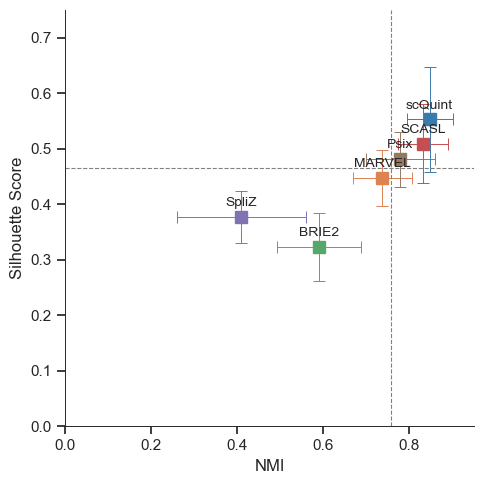

In [23]:
tool_colors = {
    'SCASL': '#C44F52',
    'MARVEL': '#DD8352',
    'SpliZ': '#8172B3',
    'Psix': '#937960',
    'scQuint': '#3a7bae',
    'BRIE2':'#55A869'
}
metrics_of_interest = ['Normalized Mutual Information (NMI)', 'Silhouette Score']
df_filtered = df[df['Metric'].isin(metrics_of_interest)]

# pivot 
pivot_df = df_filtered.pivot_table(index=['Tool', 'Metric'], values='Score', aggfunc=['mean', 'std'])
pivot_df.columns = ['mean', 'std']
pivot_df = pivot_df.reset_index()

x_df = pivot_df[pivot_df['Metric'] == metrics_of_interest[0]]
y_df = pivot_df[pivot_df['Metric'] == metrics_of_interest[1]]

plot_df = x_df.merge(y_df, on='Tool', suffixes=('_x', '_y'))

fig, ax = plt.subplots(figsize=(5, 5))

for _, row in plot_df.iterrows():
    color = tool_colors.get(row['Tool'], 'black')
    ax.errorbar(row['mean_x'], row['mean_y'],
                xerr=row['std_x']*0.5, yerr=row['std_y']*0.5,
                fmt='s', capsize=4, markersize=8,
                linewidth=0.7,  # 误差棒线条粗细
                capthick=0.7, 
                label=row['Tool'],color=color)

    ax.text(row['mean_x'], row['mean_y'] + 0.02,
            row['Tool'], fontsize=10, ha='center')
    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.spines['left'].set_linewidth(0.7)
ax.spines['bottom'].set_linewidth(0.7)

x_median = plot_df['mean_x'].median()
y_median = plot_df['mean_y'].median()


# 使用中位值画中心线
ax.axvline(x_median, linestyle='--', color='gray', linewidth=0.8)
ax.axhline(y_median, linestyle='--', color='gray', linewidth=0.8)

ax.set_xlabel('NMI')
ax.set_ylabel(metrics_of_interest[1])

ax.set_xlim(0,0.95)
ax.set_ylim(0, 0.75)
plt.tight_layout()

plt.savefig('../results/ErrorBarScatter_NMI_0.5errbar.pdf')
plt.show()

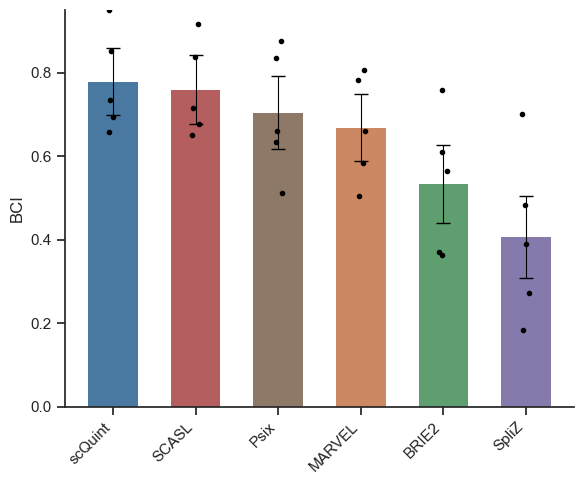

In [13]:
tool_colors = {
    'SCASL': '#C44F52',
    'MARVEL': '#DD8352',
    'SpliZ': '#8172B3',
    'Psix': '#937960',
    'scQuint': '#3a7bae',
    'BRIE2':'#55A869'
}

metrics_of_interest = ['Accuracy', 'Adjusted Rand Index (ARI)', 
                       'Normalized Mutual Information (NMI)', 
                       'Silhouette Score']
df_filtered = df[df['Metric'].isin(metrics_of_interest)]

def confidence_interval(x):
    return 1.96 * x.std() / np.sqrt(len(x))  # 95% CI

agg_df = df_filtered.groupby('Tool')['Score'].agg(['mean', 
    confidence_interval]).reset_index()
agg_df.columns = ['Tool', 'mean', 'ci']

tools_order = agg_df.sort_values('mean', ascending=False)['Tool'].tolist()

plt.figure(figsize=(6, 5))

bar_colors = [tool_colors[tool] for tool in tools_order]
sns.barplot(data=agg_df, x='Tool', y='mean', hue='Tool', order=tools_order,
            palette=tool_colors, edgecolor='black', linewidth=0., zorder=1, 
            legend=False, width=0.6)

plt.errorbar(x=range(len(agg_df)),
             y=agg_df.set_index('Tool').loc[tools_order]['mean'],
             yerr=agg_df.set_index('Tool').loc[tools_order]['ci'],
             fmt='none', ecolor='black', capsize=5, zorder=3,linewidth=0.8)

dataset_scores = df_filtered.groupby(['Tool', 'Dataset'])['Score'].mean().reset_index()
for i, tool in enumerate(tools_order):
    tool_scores = dataset_scores[dataset_scores['Tool'] == tool]['Score'].values
    x_jitter = i + 0.1 * (np.random.rand(len(tool_scores)) - 0.5)  # 添加水平抖动
    plt.scatter(x_jitter, tool_scores, color='black', s=9, zorder=4)

plt.xticks(rotation=45, ha='right')
plt.ylabel("BCI")
plt.xlabel('')
plt.ylim(0, .95)
sns.despine()
plt.tight_layout()
plt.savefig('../results/mean_score_bar.pdf')

plt.show()